# Ball classifier based on keras CNN
This notebook trains CNN for ball classification.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import SVG

import sys
import os
from os import listdir
from os.path import isfile, join, splitext
import cPickle as pickle

import numpy as np
import cv2

from ml_utils import load_images, create_image_wall

import keras

plt.rcParams['figure.figsize'] = (15, 50)
plt.rcParams['image.interpolation'] = 'nearest'

Using TensorFlow backend.


## Create dataset
execute [create_caffe_ball_dataset](./create_caffe_ball_dataset.ipynb) if necessary, please check parameters in [caffe_ball_param.py](./caffe_ball_param.py).

In [2]:
# Load  data into train and test sets
X_train, y_train = pickle.load(open("ball_train.pkl"))
X_test, y_test = pickle.load(open("ball_test.pkl"))
print len(y_train), len(y_test)

106230 45540


In [3]:
# Preprocess input data
print X_train.shape
X_train = np.transpose(X_train, (0, 3, 1, 2))  # NHWC to NCHW format
X_test = np.transpose(X_test, (0, 3, 1, 2))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

(106230, 16, 16, 1)


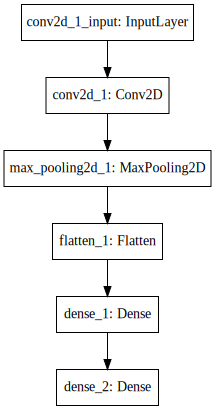

In [4]:
# Define model architecture
model = keras.models.Sequential()

from caffe_ball_param import kernel_size, sample_shape, GRAY
if GRAY:
    N_CHANNEL = 1
else:
    N_CHANNEL = 3
input_shape = (N_CHANNEL, sample_shape[0], sample_shape[1])

model.add(keras.layers.Convolution2D(filters=4, kernel_size=kernel_size, strides=2, input_shape=input_shape, data_format='channels_first'))
model.add(keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

SVG(keras.utils.vis_utils.model_to_dot(model).create(prog='dot', format='svg'))

In [5]:
# Fit model on training data
tensorboard = keras.callbacks.TensorBoard(write_images=True, histogram_freq=1)
model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, callbacks=[tensorboard])

INFO:tensorflow:Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.
INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.
INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.
INFO:tensorflow:Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.
INFO:tensorflow:Summar

In [6]:
# Evaluate model on test data
print model.evaluate(X_test, y_test, verbose=0)

[0.08427589523959185, 0.9703996486605182]


In [7]:
model.fit?